# Detectar Output audio del pc, para así detectar el audio de una emisora web. Hallar el espectro en tiempo real.

## Ideas:
- Usar Virtual audio cable para redireccionar el output audio de la computadora como input(mic) 

In [28]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.io.wavfile import write
from matplotlib.mlab import psd

In [29]:
dispositivos_entrada = [d for d in sd.query_devices() if d['max_input_channels'] > 0]

for i, dispositivo in enumerate(dispositivos_entrada):
    print(f"Índice: {i}, Nombre: {dispositivo['name']}, Canales: {dispositivo['max_input_channels']}")

Índice: 0, Nombre: Asignador de sonido Microsoft - Input, Canales: 2
Índice: 1, Nombre: CABLE Output (VB-Audio Virtual , Canales: 8
Índice: 2, Nombre: Controlador primario de captura de sonido, Canales: 2
Índice: 3, Nombre: CABLE Output (VB-Audio Virtual Cable), Canales: 8
Índice: 4, Nombre: CABLE Output (VB-Audio Virtual Cable), Canales: 2
Índice: 5, Nombre: Altavoz de PC (Realtek HD Audio 2nd output with HAP), Canales: 2
Índice: 6, Nombre: Altavoz de PC (Realtek HD Audio output with HAP), Canales: 2
Índice: 7, Nombre: Mic in at front panel (black) (Mic in at front panel (black)), Canales: 2
Índice: 8, Nombre: Mezcla estéreo (Realtek HD Audio Stereo input), Canales: 2
Índice: 9, Nombre: Varios micrófonos (Realtek HD Audio Mic input), Canales: 2
Índice: 10, Nombre: CABLE Output (VB-Audio Point), Canales: 8


Transmitiendo... Ctrl+C para detener


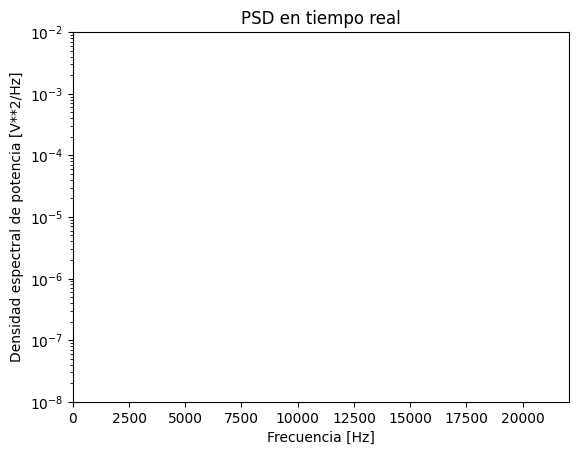

In [30]:
# Elegir el índice del dispositivo de entrada (cambiar este valor)
indice_dispositivo = 4

# Parámetros de grabación
frecuencia_muestreo = 44100  # Frecuencia de muestreo en Hz
duracion_bloque = 2  # Duración de cada bloque en segundos
tamaño_bloque = int(frecuencia_muestreo * duracion_bloque)  # Tamaño de bloque
# Inicializar la figura antes del loop para evitar recrearla cada vez
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Configurar los ejes
ax.set_xlabel('Frecuencia [Hz]')
ax.set_ylabel('Densidad espectral de potencia [V**2/Hz]')
ax.set_title('PSD en tiempo real')
ax.set_xlim(0, frecuencia_muestreo / 2)
ax.set_ylim(1e-8, 1e-2)  # Ajustar los límites para la PSD (puedes ajustarlo según los resultados)
ax.set_yscale('log')

# Función para actualizar el gráfico de la PSD
def actualizar_psd(audio_data):
    ax.cla()  # Limpiar el gráfico anterior
    # Calcular PSD usando matplotlib.mlab.psd
    Pxx, freqs = psd(audio_data, NFFT=1024, Fs=frecuencia_muestreo)
    
    # Graficar PSD
    ax.semilogy(freqs, Pxx)
    ax.set_xlabel('Frecuencia [Hz]')
    ax.set_ylabel('Densidad espectral de potencia [V**2/Hz]')
    ax.set_title('PSD en tiempo real')
    ax.set_xlim(0, frecuencia_muestreo / 2)
    ax.set_ylim(1e-8, 1e-2)
    plt.pause(0.01)  # Pausa pequeña para actualizar el gráfico

# Función de callback de stream de audio
def callback(indata, frames, time, status):
    if status:
        print(status)
    # Convertir audio en tiempo real a una dimensión
    audio_data = indata[:, 0]
    
    # Actualizar PSD
    actualizar_psd(audio_data)

# Iniciar la transmisión de audio en tiempo real
with sd.InputStream(samplerate=frecuencia_muestreo, channels=1, dtype='float32', callback=callback, device=indice_dispositivo, blocksize=tamaño_bloque):
    print("Transmitiendo... Ctrl+C para detener")
    plt.show()  # Mantener la ventana de matplotlib abierta